In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="-1"

In [13]:
import keras
import tensorflow as tf
from keras import layers
import keras
import tensorflow_hub as hub

# Simple ResNet architecture

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 30)   300         Input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 30)   8130        conv2d[0][0]                     
__________________________________________________________________________________________________
add (Add)                       (None, 28, 28, 30)   0           conv2d_1[0][0]                   
                                                                 Input[0][0]                  

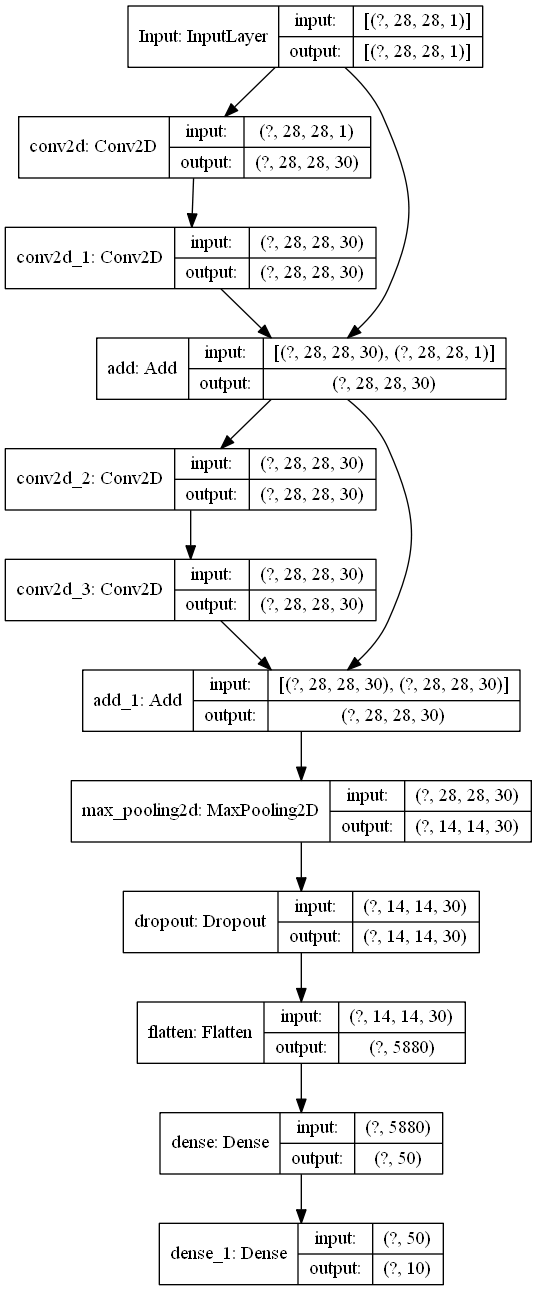

In [3]:
def Model():
  
    input_layer = keras.Input(shape=(28,28,1), name="Input")
    x = layers.Conv2D(30, kernel_size=(3, 3), activation='relu', padding="same")(input_layer)

    x = layers.Conv2D(30, kernel_size=(3, 3), activation='relu', padding="same")(x)
    
    block_1_output = keras.layers.add([x, input_layer])

    x = layers.Conv2D(30, kernel_size=(3, 3), activation='relu', padding="same")(block_1_output)
    x = layers.Conv2D(30, kernel_size=(3, 3), activation='relu', padding="same")(x)
    
    block_2_output = keras.layers.add([x, block_1_output])
    
    
    x = layers.MaxPooling2D(pool_size=(2, 2), padding="same")(block_2_output)  
    
    x = layers.Dropout(0.2)(x)
    x = layers.Flatten()(x)

    x = layers.Dense(50, activation='relu')(x)

    output_layer = layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=output_layer, name="model")


    # Compile model
    model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

    return model


# build the model
model = Model()
model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

# Forecasting with LeakyReLU

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 150)               300       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 150)               22650     
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 151       
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                

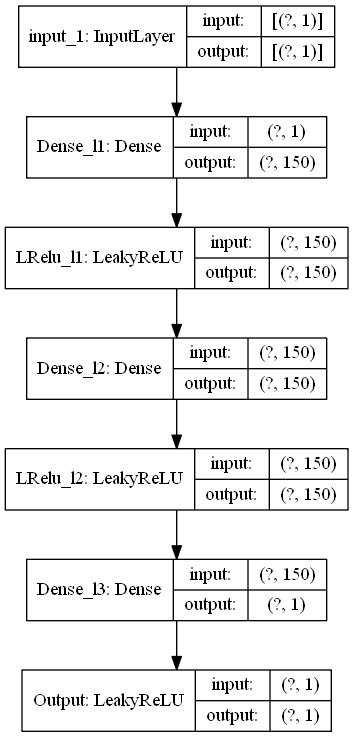

In [4]:
def Model():
    input_layer = keras.Input(shape=(1,))  
    x = layers.Dense(150,name="Dense_l1")(input_layer)
    x = layers.LeakyReLU(name = "LRelu_l1")(x)
    x = layers.Dense(150,name = "Dense_l2")(x)
    x = layers.LeakyReLU(name = "LRelu_l2")(x)
    x = layers.Dense(1,name="Dense_l3")(x)
    output_layer = layers.LeakyReLU(name = "Output")(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    
    return model


model = Model()
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

# Autoencoders

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


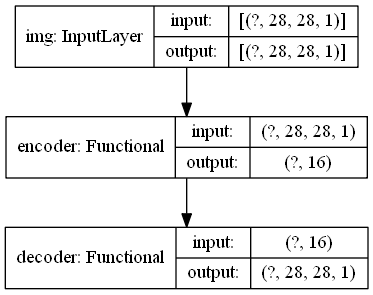

In [6]:
def create_encoder_model(input_shape):
    # Create an encoder model
    encoder_input = keras.Input(shape=input_shape, name="original_img")
    x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.MaxPooling2D(3)(x)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.Conv2D(16, 3, activation="relu")(x)
    encoder_output = layers.GlobalMaxPooling2D()(x)
    encoder = keras.Model(encoder_input, encoder_output, name="encoder")
    
    return encoder, encoder_output.shape[1]

def create_decoder_model(output_shape):
    # Create a decoder model using the output shape of the encoder model
    decoder_input = keras.Input(shape=(output_shape,), name="encoded_img")
    x = layers.Reshape((4, 4, 1))(decoder_input)
    x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
    x = layers.UpSampling2D(3)(x)
    x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
    decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

    decoder = keras.Model(decoder_input, decoder_output, name="decoder")
    
    return decoder

def combine_models(input_shape, encoder, decoder):
    # Combine the two models to get the autoencoder model
    autoencoder_input = keras.Input(shape=input_shape, name="img")
    encoded_img = encoder(autoencoder_input)   # add encoder layers
    decoded_img = decoder(encoded_img)         # add decoder layers
    autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
    
    return autoencoder

input_shape = (28, 28, 1) 

encoder, output_shape = create_encoder_model(input_shape)
decoder = create_decoder_model(output_shape)
autoencoder = combine_models(input_shape, encoder, decoder)
autoencoder.summary()
keras.utils.plot_model(autoencoder, "model.png", show_shapes=True)

# Models with multiple inputs and outputs

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_text (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
Input_name (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     1280000     Input_text[0][0]                 
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     1280000     Input_name[0][0]                 
______________________________________________________________________________________________

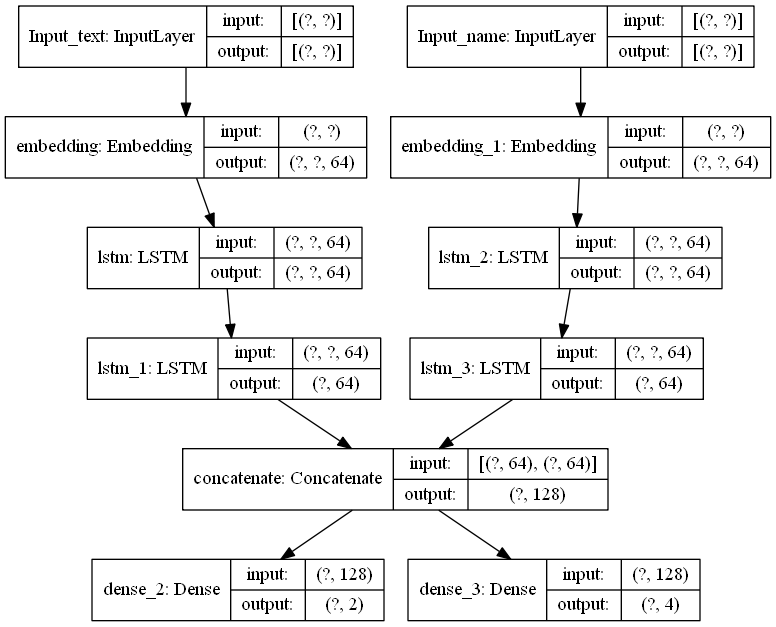

In [11]:
def Model():
    vocabulary_size = 20000

    input_layer_text = keras.Input(shape=(None,), name="Input_text", dtype=tf.int64)  
    embedding_layer_text = layers.Embedding(vocabulary_size, 64)(input_layer_text)
    x_text = layers.LSTM(64, activation="relu", dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embedding_layer_text)
    x_text = layers.LSTM(64, activation="relu", dropout=0.2, recurrent_dropout=0.2)(x_text)

    input_layer_name = keras.Input(shape=(None,), name="Input_name", dtype=tf.int64)  
    embedding_layer_name = layers.Embedding(vocabulary_size, 64)(input_layer_name)
    x_name = layers.LSTM(64, activation="relu", dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embedding_layer_name)
    x_name = layers.LSTM(64, activation="relu", dropout=0.2, recurrent_dropout=0.2)(x_name)

    x = layers.concatenate([x_text, x_name])

    output_layer1 = tf.keras.layers.Dense(2, activation='softmax')(x)
    output_layer2 = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = keras.Model(inputs=[input_layer_text, input_layer_name], outputs=[output_layer1, output_layer2], name="model")

    return model

model = Model()
model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)
    
    

# TensorFlow Hub

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer_28 (KerasLayer)  (None, 1280)              2257984   
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


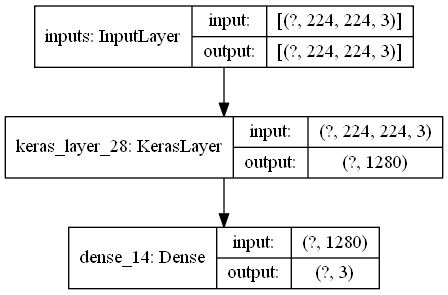

In [45]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

input_layer = keras.Input(shape=(224, 224, 3), dtype=tf.float32, name='inputs')  

hub_layer = hub.KerasLayer(URL, output_shape=[1280], trainable=False)(input_layer)

output_layer = layers.Dense(3, activation='softmax')(hub_layer)

model = keras.Model(inputs=input_layer, outputs=output_layer, name="model")
model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

# Segmentation with U-Net

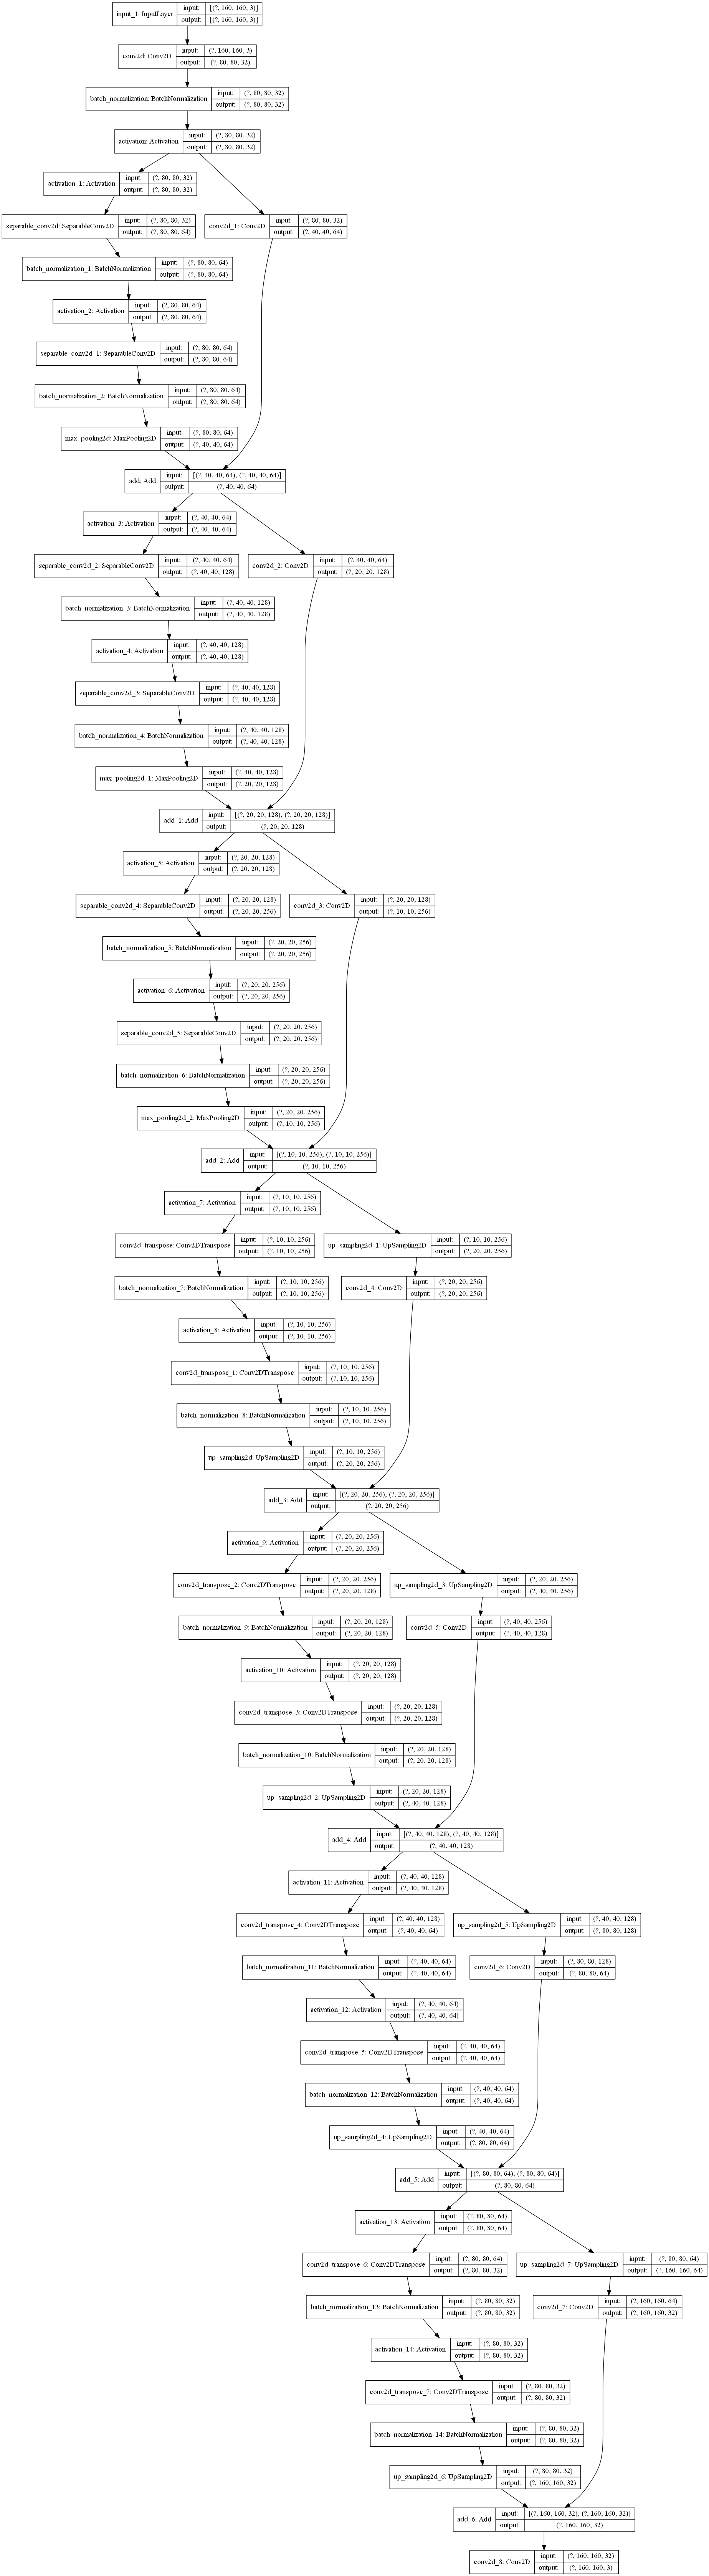

In [58]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Build model
img_size = (160, 160)
num_classes = 3
model = get_model(img_size, num_classes)
keras.utils.plot_model(model, "model.png", show_shapes=True)